# Steven To

## Research question/interests

**I want to work with these datasets to gain a greater understanding on Air bnb listings for my personal benefit when I travel.
Specifically, which neighborhood has the listings with the best price per minimum night stay**

I can find the answer to this question by isolating, manipulating and analysing the relevant data.

## Analysis Plan:
1. Drop any NaN values and irrelavant columns.
1. Add a column that identifies the city.
1. Consolidate/combine our three data sets into one.
1. Isolate individual neighborhoods and collect numeric data releavant to our research questions.
1. Find the best way to represent this data visually.

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
df = pd.read_csv('../data/raw/montreal_listings.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,29059,Lovely studio Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.519390,-73.564820,Entire home/apt,147,2,396,2022-11-25,2.60,2,339,51,NaN
1,29061,Maison historique - Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.519290,-73.564930,Entire home/apt,278,3,111,2022-10-11,0.84,2,291,26,NaN
2,34715,Chez Patrac ! Montreal - Métro Beaubien,149769,Alain,NaN,Rosemont-La Petite-Patrie,45.538180,-73.603600,Entire home/apt,160,14,9,2022-11-18,0.06,1,131,3,261 026
3,36301,Romantic & peaceful Plateau loft,381468,Sylvie,NaN,Le Plateau-Mont-Royal,45.530260,-73.584130,Entire home/apt,160,31,45,2022-08-22,0.49,6,295,3,NaN
4,46626,Beautiful! Charming! Spacious! Rooms!,208453,Maureen,NaN,Côte-des-Neiges-Notre-Dame-de-Grâce,45.470120,-73.607250,Private room,65,3,42,2022-10-22,0.30,2,361,18,305995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13908,781177266138093057,"Clean, Comfy and Modern Studio",279892,Julie,NaN,Côte-des-Neiges-Notre-Dame-de-Grâce,45.470596,-73.643483,Entire home/apt,42,32,0,NaN,NaN,1,173,0,NaN
13909,781184587986243680,Spacious 3 bedroom Apt on the Plateau,488779216,Daniel,NaN,Le Plateau-Mont-Royal,45.535280,-73.581756,Entire home/apt,155,2,0,NaN,NaN,18,125,0,NaN
13910,781197509172526291,Lovely 3-bedroom unit - 5 minutes from Downtown,485486671,Sofiane,NaN,Verdun,45.456360,-73.567709,Entire home/apt,99,1,0,NaN,NaN,6,79,0,NaN
13911,781199594633475354,Elegant&Modern Studio Walking Distance to Old ...,4483520,Mikaila,NaN,Ville-Marie,45.516092,-73.563601,Entire home/apt,69,2,0,NaN,NaN,10,86,0,NaN


In [ ]:
##Preface: Initial EDA analysis below for raw data.

df.describe()
##Neighbourhood column can be used to group listings.
##Mean can be used to see average price is 169.15 per average minimum nights of 15.36.
##Other potentially useful columns are the average availability of 133 days/year
##Problems withthe data include: MIN-MAX price being 0.0-110672.0, and a MIN availability_365 of 0.0, Max of Minimum_nights at 11684.0

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.391300e+04,1.391300e+04,0.0,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000,10910.000000,13913.000000,13913.000000,13913.000000
mean,2.195227e+17,1.606615e+08,NaN,45.513961,-73.589149,169.153022,15.356645,23.733199,1.371212,10.958025,133.022066,8.591821
std,3.223575e+17,1.549882e+08,NaN,0.032514,0.044299,1450.083079,106.970858,48.820176,1.766798,28.894207,136.248491,16.735904
min,2.905900e+04,2.319000e+03,NaN,45.404394,-73.968140,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.276793e+07,2.743721e+07,NaN,45.495490,-73.602580,61.000000,1.000000,1.000000,0.160000,1.000000,0.000000,0.000000
50%,4.214981e+07,1.072785e+08,NaN,45.515850,-73.578570,98.000000,2.000000,5.000000,0.640000,2.000000,85.000000,1.000000
75%,6.348495e+17,2.622365e+08,NaN,45.532200,-73.564340,150.000000,25.000000,24.000000,2.000000,7.000000,264.000000,9.000000
max,7.814348e+17,4.913370e+08,NaN,45.699950,-73.481630,110672.000000,11684.000000,771.000000,25.080000,210.000000,365.000000,306.000000


In [ ]:
df.describe(include=object)
##There are 13913 values for neighborhood with 33 unique neighborhoods


,name,host_name,neighbourhood,room_type,last_review,license
count,13907,13913,13913,13913,10910,1041
unique,13511,3858,33,4,1659,536
top,Downtown Montreal Fully furnished apartment WIFI,Corporate Stays,Ville-Marie,Entire home/apt,2022-11-27,Citq:568912
freq,68,210,4155,10716,554,26


In [ ]:
df.shape, df.columns

((13913, 18),
 Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
        'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
        'minimum_nights', 'number_of_reviews', 'last_review',
        'reviews_per_month', 'calculated_host_listings_count',
        'availability_365', 'number_of_reviews_ltm', 'license'],
       dtype='object'))

In [ ]:
nhs = sorted(df["neighbourhood"].unique().tolist())
nhs

['Ahuntsic-Cartierville',
 'Anjou',
 "Baie-d'Urfé",
 'Beaconsfield',
 'Côte-Saint-Luc',
 'Côte-des-Neiges-Notre-Dame-de-Grâce',
 'Dollard-des-Ormeaux',
 'Dorval',
 'Hampstead',
 'Kirkland',
 "L'Île-Bizard-Sainte-Geneviève",
 'LaSalle',
 'Lachine',
 'Le Plateau-Mont-Royal',
 'Le Sud-Ouest',
 'Mercier-Hochelaga-Maisonneuve',
 'Mont-Royal',
 'Montréal-Est',
 'Montréal-Nord',
 'Montréal-Ouest',
 'Outremont',
 'Pierrefonds-Roxboro',
 'Pointe-Claire',
 'Rivière-des-Prairies-Pointe-aux-Trembles',
 'Rosemont-La Petite-Patrie',
 'Saint-Laurent',
 'Saint-Léonard',
 'Sainte-Anne-de-Bellevue',
 'Senneville',
 'Verdun',
 'Ville-Marie',
 'Villeray-Saint-Michel-Parc-Extension',
 'Westmount']

Text(0, 0.5, '')

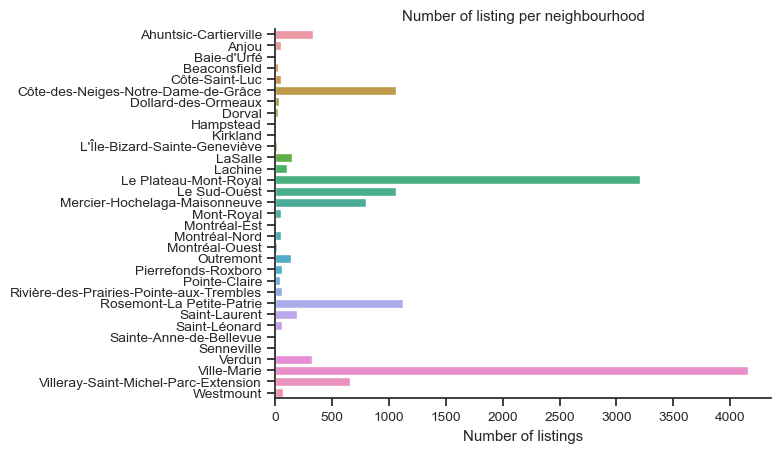

In [ ]:
sns.set_theme(style="ticks", font_scale=0.9,)

plt.rc("axes.spines", top=False, right=False)

nhvsp=sns.countplot(y="neighbourhood",data=df,order=nhs)
nhvsp.set_title("Number of listing per neighbourhood")
nhvsp.set_xlabel("Number of listings")
nhvsp.set_ylabel("")

##Plot shows that the top 3 neighbourhoods with the greatest amount of listings are Ville-Marie, Le Plateau..., Cote-des-Neiges...
##The amount of listings for example, Ville-Marie with 4000+ seems to be excessive for a single neighbourhood; could be an error.

[Text(0.5, 1.0, 'Minimum_nights VS. Price')]

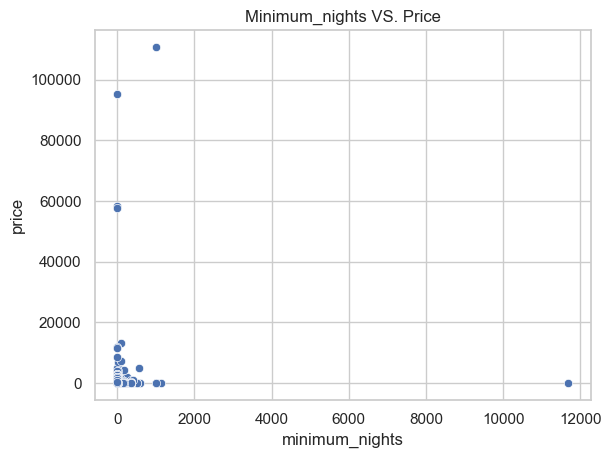

In [ ]:
sns.set_theme(style="whitegrid")

ax_montreal_plot = sns.scatterplot(data=df, x="minimum_nights", y="price") 
ax_montreal_plot.set(title="Minimum_nights VS. Price")
##Testing again for the issue regarding outliers using two new columns/values, it appears that there are outliers.
##These outliers make it so that the data is difficult to interpret and the values themselves may be possible errors.

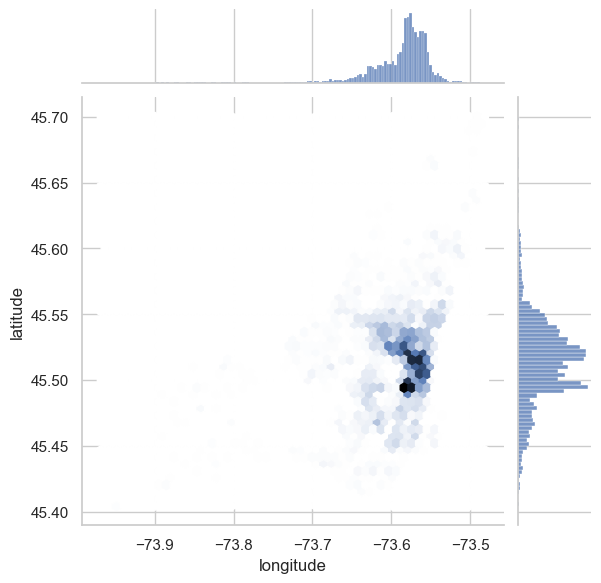

In [ ]:
ax_montreal_plot2 = sns.jointplot(x=df["longitude"], y=df["latitude"], kind="hex")

##The jointplot shows where the greatest concentration of listings are relative the latitude and longitude of the earth.
##The general latitude and longitude is within what is expected of Montreal.

## Milestone3 Task2
**Original Question:** **I want to work with these datasets to gain a greater understanding on Air bnb listings for my personal benefit when I travel.
Specifically, which neighborhood has the listings with the best price per minimum night stay**

I feel as though my question is still relevant enough and that after playing around with the data it seems that I have not fully answered this question yet.

To continue on with the steps towards answering my research question I have a revised analysis plan:
1. I still need to drop any irrelvant columns, NaN values, etc.
1. I found that there are some outlier values which are skewing my plots/making them unreadable.
1. Need to find a way to compare strings(neighborhood) to and integer equation(average price per minimum night). I will need to add a column that shows the average price per minimum night.
1. Perhaps I may need to remove some neighborhoods or only select ones which have a certain amount of rentals.


## Milestone 4 
### Task 1 Analysis Pipeline

In [ ]:
#Load data
df = pd.read_csv('../data/raw/montreal_listings.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,29059,Lovely studio Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.519390,-73.564820,Entire home/apt,147,2,396,2022-11-25,2.60,2,339,51,NaN
1,29061,Maison historique - Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.519290,-73.564930,Entire home/apt,278,3,111,2022-10-11,0.84,2,291,26,NaN
2,34715,Chez Patrac ! Montreal - Métro Beaubien,149769,Alain,NaN,Rosemont-La Petite-Patrie,45.538180,-73.603600,Entire home/apt,160,14,9,2022-11-18,0.06,1,131,3,261 026
3,36301,Romantic & peaceful Plateau loft,381468,Sylvie,NaN,Le Plateau-Mont-Royal,45.530260,-73.584130,Entire home/apt,160,31,45,2022-08-22,0.49,6,295,3,NaN
4,46626,Beautiful! Charming! Spacious! Rooms!,208453,Maureen,NaN,Côte-des-Neiges-Notre-Dame-de-Grâce,45.470120,-73.607250,Private room,65,3,42,2022-10-22,0.30,2,361,18,305995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13908,781177266138093057,"Clean, Comfy and Modern Studio",279892,Julie,NaN,Côte-des-Neiges-Notre-Dame-de-Grâce,45.470596,-73.643483,Entire home/apt,42,32,0,NaN,NaN,1,173,0,NaN
13909,781184587986243680,Spacious 3 bedroom Apt on the Plateau,488779216,Daniel,NaN,Le Plateau-Mont-Royal,45.535280,-73.581756,Entire home/apt,155,2,0,NaN,NaN,18,125,0,NaN
13910,781197509172526291,Lovely 3-bedroom unit - 5 minutes from Downtown,485486671,Sofiane,NaN,Verdun,45.456360,-73.567709,Entire home/apt,99,1,0,NaN,NaN,6,79,0,NaN
13911,781199594633475354,Elegant&Modern Studio Walking Distance to Old ...,4483520,Mikaila,NaN,Ville-Marie,45.516092,-73.563601,Entire home/apt,69,2,0,NaN,NaN,10,86,0,NaN


In [ ]:
#Drop irrelevant columns
df_clean2 = df.drop(columns=['id','name','host_id','host_name','neighbourhood_group','room_type','number_of_reviews','last_review','reviews_per_month'
                            ,'calculated_host_listings_count','availability_365','number_of_reviews_ltm','license'])
df_clean2

,neighbourhood,latitude,longitude,price,minimum_nights
0,Ville-Marie,45.519390,-73.564820,147,2
1,Ville-Marie,45.519290,-73.564930,278,3
2,Rosemont-La Petite-Patrie,45.538180,-73.603600,160,14
3,Le Plateau-Mont-Royal,45.530260,-73.584130,160,31
4,Côte-des-Neiges-Notre-Dame-de-Grâce,45.470120,-73.607250,65,3
...,...,...,...,...,...
13908,Côte-des-Neiges-Notre-Dame-de-Grâce,45.470596,-73.643483,42,32
13909,Le Plateau-Mont-Royal,45.535280,-73.581756,155,2
13910,Verdun,45.456360,-73.567709,99,1
13911,Ville-Marie,45.516092,-73.563601,69,2


In [ ]:
#Remove NaN Values
df_clean2.dropna(subset = ['latitude','longitude','price','minimum_nights'])

df_clean2

,neighbourhood,latitude,longitude,price,minimum_nights
0,Ville-Marie,45.519390,-73.564820,147,2
1,Ville-Marie,45.519290,-73.564930,278,3
2,Rosemont-La Petite-Patrie,45.538180,-73.603600,160,14
3,Le Plateau-Mont-Royal,45.530260,-73.584130,160,31
4,Côte-des-Neiges-Notre-Dame-de-Grâce,45.470120,-73.607250,65,3
...,...,...,...,...,...
13908,Côte-des-Neiges-Notre-Dame-de-Grâce,45.470596,-73.643483,42,32
13909,Le Plateau-Mont-Royal,45.535280,-73.581756,155,2
13910,Verdun,45.456360,-73.567709,99,1
13911,Ville-Marie,45.516092,-73.563601,69,2


In [ ]:
df_clean2.reset_index()
df_clean2.reset_index(drop=True)
df_clean2

,neighbourhood,latitude,longitude,price,minimum_nights
0,Ville-Marie,45.519390,-73.564820,147,2
1,Ville-Marie,45.519290,-73.564930,278,3
2,Rosemont-La Petite-Patrie,45.538180,-73.603600,160,14
3,Le Plateau-Mont-Royal,45.530260,-73.584130,160,31
4,Côte-des-Neiges-Notre-Dame-de-Grâce,45.470120,-73.607250,65,3
...,...,...,...,...,...
13908,Côte-des-Neiges-Notre-Dame-de-Grâce,45.470596,-73.643483,42,32
13909,Le Plateau-Mont-Royal,45.535280,-73.581756,155,2
13910,Verdun,45.456360,-73.567709,99,1
13911,Ville-Marie,45.516092,-73.563601,69,2


In [ ]:
df_clean2.max(axis=0)

neighbourhood     Westmount
latitude           45.69995
longitude         -73.48163
price                110672
minimum_nights        11684
dtype: object

In [ ]:
df_clean2.min(axis=0)

neighbourhood     Ahuntsic-Cartierville
latitude                      45.404394
longitude                     -73.96814
price                                 0
minimum_nights                        1
dtype: object

In [ ]:
##I've decided to make my research based on the max "minimum_nights" to >=1day and <=14 days as well as make sure price is >0
df_clean2 = df_clean2.loc[(df_clean2['minimum_nights'] >= 1) & (df_clean2['minimum_nights'] <= 14)]
df_clean2


,neighbourhood,latitude,longitude,price,minimum_nights
0,Ville-Marie,45.519390,-73.564820,147,2
1,Ville-Marie,45.519290,-73.564930,278,3
2,Rosemont-La Petite-Patrie,45.538180,-73.603600,160,14
4,Côte-des-Neiges-Notre-Dame-de-Grâce,45.470120,-73.607250,65,3
5,Rosemont-La Petite-Patrie,45.541570,-73.607370,97,3
...,...,...,...,...,...
13907,Le Plateau-Mont-Royal,45.521234,-73.592448,149,2
13909,Le Plateau-Mont-Royal,45.535280,-73.581756,155,2
13910,Verdun,45.456360,-73.567709,99,1
13911,Ville-Marie,45.516092,-73.563601,69,2


In [ ]:
df_clean2 = df_clean2.loc[(df_clean2['price'] > 0)]
df_clean2

,neighbourhood,latitude,longitude,price,minimum_nights
0,Ville-Marie,45.519390,-73.564820,147,2
1,Ville-Marie,45.519290,-73.564930,278,3
2,Rosemont-La Petite-Patrie,45.538180,-73.603600,160,14
4,Côte-des-Neiges-Notre-Dame-de-Grâce,45.470120,-73.607250,65,3
5,Rosemont-La Petite-Patrie,45.541570,-73.607370,97,3
...,...,...,...,...,...
13907,Le Plateau-Mont-Royal,45.521234,-73.592448,149,2
13909,Le Plateau-Mont-Royal,45.535280,-73.581756,155,2
13910,Verdun,45.456360,-73.567709,99,1
13911,Ville-Marie,45.516092,-73.563601,69,2


In [ ]:
df_clean2.max(axis=0),'',df_clean2.min(axis=0)

(neighbourhood     Westmount
 latitude           45.69923
 longitude        -73.482931
 price                 95211
 minimum_nights           14
 dtype: object,
 '',
 neighbourhood     Ahuntsic-Cartierville
 latitude                      45.404394
 longitude                     -73.96814
 price                                13
 minimum_nights                        1
 dtype: object)